In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

ModuleNotFoundError: No module named 'imblearn'

## 1. Read and knowing dataset

In [10]:
#đọc dataset
data = pd.read_csv('house.csv')
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02/05/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,02/05/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,02/05/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,02/05/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,02/05/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [5]:
# thông tin của dataset và check các giá trị trống và thống kê về các giá trị(min,max,avg...)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### * Nhận xét ban đầu về dataset:

## 2. Data Visualization

In [ ]:
# Biểu đồ tương quan chênh lệch của giữa các cột sqft_lot,sqft_living và price

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

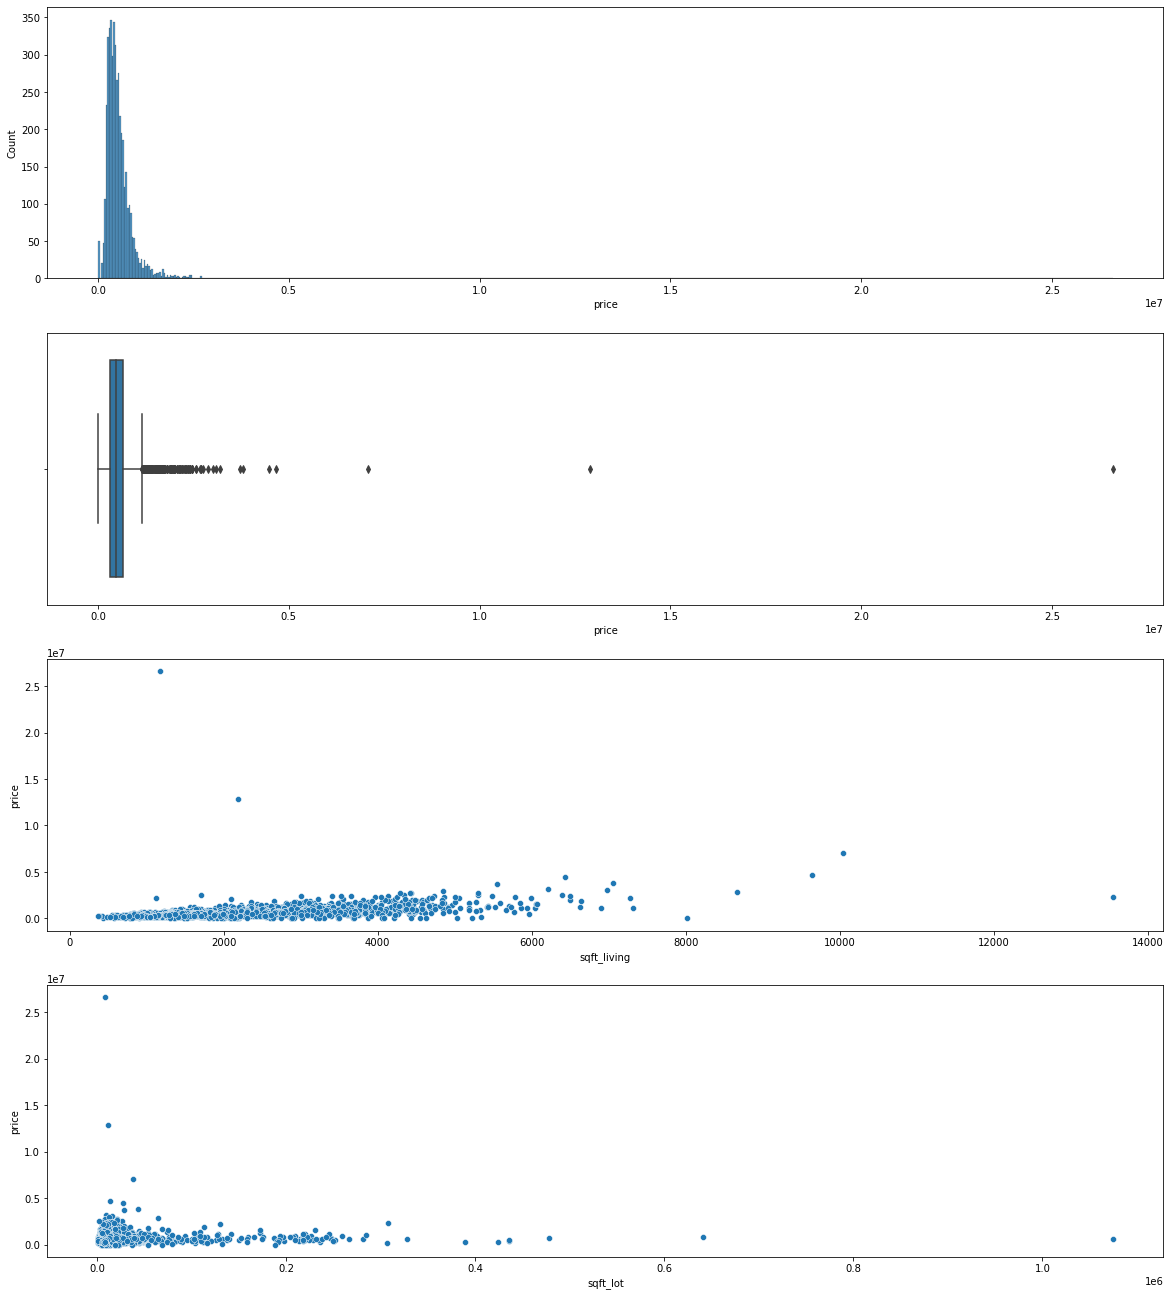

In [9]:
f,ax = plt.subplots(4,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])
sns.scatterplot(x= 'sqft_lot',y = 'price',data=data, ax=ax[3])

## 2. Data Pre-Processing


MindSet ban đầu: Giá nhà sẽ bị ảnh hưởng bởi một số thuộc tính như là: Số lượng phòng ngủ, số lượng phòng tắm, số lầu, số cửa sổ....
-Vì mô hình dự đoán cần các giá trị là số nên cần có một số bước tiền sử lý dữ liệu trước đó.

In [11]:
# Làm tròn các features: bedroom, bathroom, price
data['bedrooms'] = data['bedrooms'].round().astype(int)
data['bathrooms'] = data['bathrooms'].round().astype(int)
data['price'] = data['price'].round(decimals=2)
# Đổi kiểu giá trị của statezip thành kiểu số(int)
data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True).astype(int)

In [14]:
# Lọc những ngồi nhà có giá trị bằng 0
data.loc[(data['price']) == 0].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,05/05/2014 0:00,0.0,3,2,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,98001,USA
4356,05/05/2014 0:00,0.0,4,3,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,98199,USA
4357,05/05/2014 0:00,0.0,6,3,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,98146,USA
4358,06/05/2014 0:00,0.0,5,4,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,98075,USA
4361,07/05/2014 0:00,0.0,5,2,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,98166,USA


In [17]:
# Lọc những ngôi nhà không có phòng ngủ
data.loc[(data['bedrooms']) == 0].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,12/06/2014 0:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,24/06/2014 0:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [18]:
# Lọc những ngôi nhà không có phòng tắm
data.loc[(data['bathrooms']) == 0].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,12/06/2014 0:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,24/06/2014 0:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [21]:
# Kiểm tra các ngôi nhà đặc biệt, có giá trị cao nhất trong dataset
data.sort_values(by=['price'], ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,03/07/2014 0:00,26590000.0,3,2,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
4346,23/06/2014 0:00,12899000.0,3,2,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
2286,11/06/2014 0:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,17/06/2014 0:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2761,18/06/2014 0:00,4489000.0,4,3,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,98004,USA


In [22]:
# Kiểm tra các ngôi nhà đặc biệt, có giá trị thấp nhất trong dataset
data.loc[(data['price'] > 0)].sort_values(by=['price']).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,06/05/2014 0:00,7800.0,2,1,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,98168,USA
1219,23/05/2014 0:00,80000.0,1,1,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,98014,USA
1587,29/05/2014 0:00,83000.0,2,1,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,98168,USA


In [23]:
# Những ngôi nhà có diện tích rộng nhất
data.sort_values(by=['sqft_living'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,05/05/2014 0:00,2280000.0,7,8,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,98053,USA
2286,11/06/2014 0:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,17/06/2014 0:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2328,11/06/2014 0:00,2888000.0,5,6,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,98177,USA
4575,02/07/2014 0:00,0.0,5,6,8020,21738,2.0,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,98006,USA


In [26]:
# Những ngôi nhà có diện tích rộng nhất
data.sort_values(by=['sqft_lot'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3487,26/06/2014 0:00,667000.0,3,2,3320,478288,1.5,0,3,4,2260,1060,1933,1982,40201 292nd Ave SE,Enumclaw,98022,USA
879,19/05/2014 0:00,480000.0,4,4,3370,435600,2.0,0,3,3,3370,0,2005,0,44250 SE Edgewick Rd,North Bend,98045,USA
375,08/05/2014 0:00,330000.0,2,2,1550,435600,1.5,0,0,2,1550,0,1972,0,36521 SE 94th St,Snoqualmie,98065,USA
1539,29/05/2014 0:00,302000.0,2,1,900,423838,1.0,0,2,5,900,0,1925,0,18923 SE 416th St,Enumclaw,98022,USA
3056,23/06/2014 0:00,230000.0,3,1,1530,389126,1.5,0,0,4,1530,0,1919,1985,24727 SE Mud Mountain Rd,Enumclaw,98022,USA


In [42]:
# Xử lý missing data
# Tạo một data frame của những data missing bằng cách thêm giá = 0 và phòng ngủ = 0
missing = data.loc[(data['price'] == 0)]#.append(data.loc[(data['bathrooms'] == 0)])
missing = data.loc[(data['bathrooms'] == 0)]
# Tạo một list chứa các index của điểm dữ liệu bị lỗi
missing_index_list = missing.reset_index()['index'].to_list()
# Thêm index vào các giá trị đặc biệt
missing_index_list.extend([122,1078,2480,4346,4350,4351])
# Sắp xếp lại list để nó không ảnh hưởng đến index
missing_index_list.sort(reverse = True)
# 


## 3. Xây dựng mô hình hồi quy

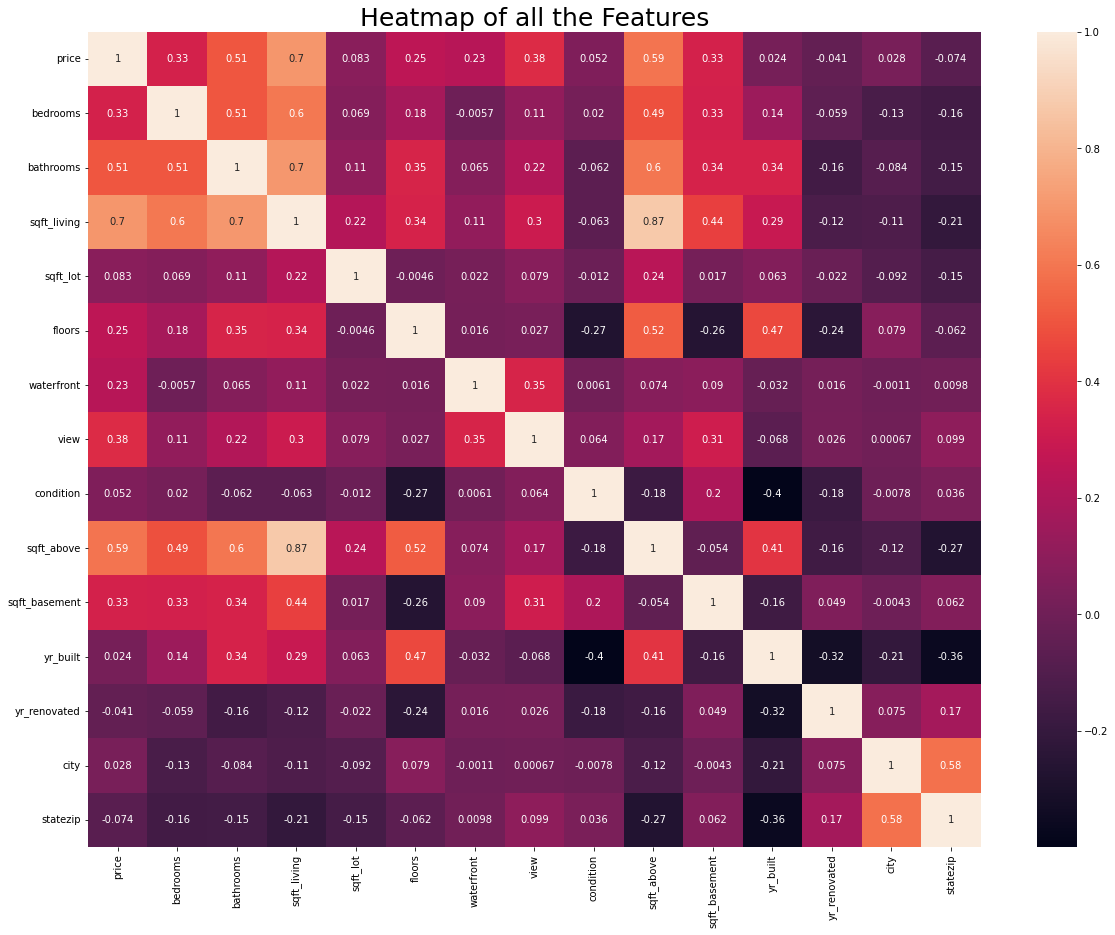

In [47]:
# Độ tương quan giữa các feauture: date, street,country
feautures = data.drop(['date','street','country'],axis=1)

encoder = LabelEncoder()
feautures['city'] = encoder.fit_transform(feautures['city'])

plt.figure(figsize=(20,15))
sns.heatmap(feautures.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 25);
plt.show()

In [66]:
# Tách x và y( X: biến giá trị đưa vào, y: Giá trị đầu ra)
y = feautures['price']
X = feautures.drop(['price','yr_renovated','statezip'],axis=1)

In [67]:
# Tách train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Mô hình hồi quy tuyến tính(Linear Regression)

Độ chính xác của tập train  0.5924668108582277
Độ chính xác của tập test 0.5384419838701968

coefficient
[-5.71846501e+04  4.99968127e+04  1.84770541e+02 -8.33138820e-01
  5.39688643e+04  5.07417505e+05  5.60635139e+04  2.85817139e+04
  1.06112641e+02  7.86578997e+01 -2.44218368e+03  1.32104223e+03]

intercept
4623397.241693278

Giá dự đoán của ngồi nhà thứ 1 : $ 614983.6059439084
Giá dự đoán của ngồi nhà thứ 2 : $ 399468.6171281142
Giá dự đoán của ngồi nhà thứ 3 : $ 504644.1975991591
Giá dự đoán của ngồi nhà thứ 4 : $ 457512.35536810104
Giá dự đoán của ngồi nhà thứ 5 : $ 549285.8288050243
Giá dự đoán của ngồi nhà thứ 6 : $ 741271.0579730151
Giá dự đoán của ngồi nhà thứ 7 : $ 194368.84744914807
Giá dự đoán của ngồi nhà thứ 8 : $ 312952.51338950824
Giá dự đoán của ngồi nhà thứ 9 : $ 470479.2219020515
Giá dự đoán của ngồi nhà thứ 10 : $ 635434.4182454702

Giá thực tế của ngôi nhà 1 : $ 499431.0
Giá thực tế của ngôi nhà 2 : $ 420000.0
Giá thực tế của ngôi nhà 3 : $ 568000.0
Giá thực tế củ

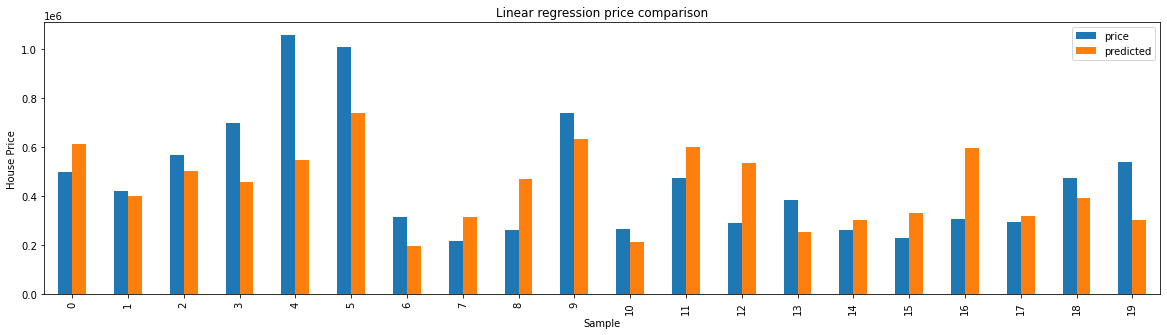

In [71]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Độ chính xác của tập train ', reg.score(X_train, y_train))
print('Độ chính xác của tập test', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Giá dự đoán của ngồi nhà thứ', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Giá thực tế của ngôi nhà', list(y_test).index(i)+1, ': $', i)
print()


# Visualise
reg_real_price = pd.DataFrame(y_test[:20]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:20], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()